# Interpolation of data
- Amin Hashemian

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Taylor expansion

we can expand any continuous function as a polynomials

\\( f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n\\)

Here, \\( f^{(n)} \\) is the nth derivative and \\( x_0 \\) is the argument around which we expand the function

### 1.1 Example: Exponential function

\\( f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x) \\)

In [2]:
def expTaylor(x, x0, nmax):
    # x: Argument
    # x0: Argument at which the derivatives will be calculated
    # nmax: n at which the series will terminate
    t = 0
    for n in range(nmax+1):
        t = t + np.exp(x0) * (x-x0)**n / np.math.factorial(n)
    return t

In [3]:
expTaylor(1, 0, 10)

2.7182818011463845

In [4]:
np.exp(1)

2.718281828459045

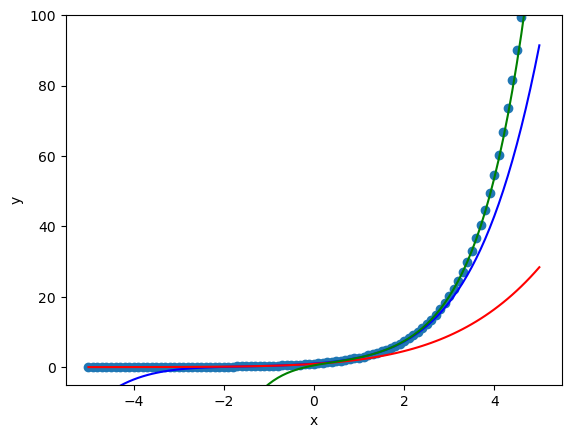

In [5]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5,100])

x_list = np.linspace(-5,5,101)
plt.scatter(x_list, np.exp(x_list))

nmax = 5
plt.plot(x_list, expTaylor(x_list, 0, nmax), 'blue')
plt.plot(x_list, expTaylor(x_list, -3, nmax), 'red')
plt.plot(x_list, expTaylor(x_list, 2, nmax), 'green')

### 1.2 Example: sin function at \\(x_0 = 0\\)

\\( f(0) = f''(0) = f^{(4)}(0) = \dots = 0 \\)

\\( f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1 \\)

\\( f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1 \\)

\\( \sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}\\)

In [6]:
def sinTaylor(x, nmax):
    # x: Argument
    # nmax: n at which the series will terminate
    t = 0
    for n in range(nmax+1):
        t = t + (-1)**n * x**(2*n+1) / np.math.factorial(2*n+1)
    return t

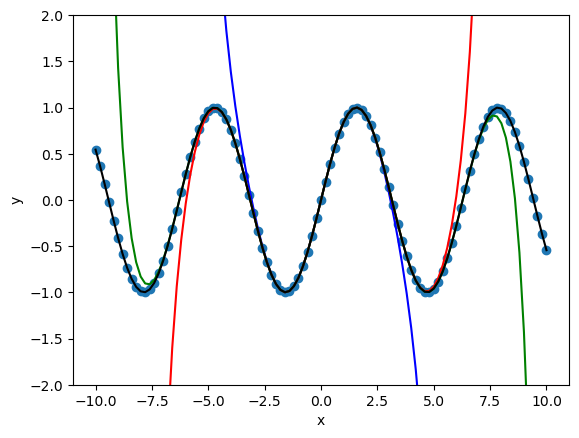

In [7]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,2])

x_list = np.linspace(-10,10,101)
plt.scatter(x_list, np.sin(x_list))

plt.plot(x_list, sinTaylor(x_list, 3), 'blue')
plt.plot(x_list, sinTaylor(x_list, 6), 'red')
plt.plot(x_list, sinTaylor(x_list, 9), 'green')
plt.plot(x_list, sinTaylor(x_list, 18), 'black')

- Accuracy of \\( \sin(10.5) \\)

In [8]:
np.sin(10.5) - sinTaylor(10.5, 50)

-2.844391389089651e-13

### 1.3 Implementation of a general function

Derivative : \\( f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} \\)

In [9]:
def derivative(f, x, h):
    # f: Function
    # x: Argument of f
    # h: Stepsize
    return (f(x+h) - f(x)) / h

In [10]:
def func(x):
    return 2*np.sin(x)**2 + x

In [11]:
x0 = 10.5
h = 0.1

In [12]:
func(x0)

12.04772926022427

In [13]:
derivative(func, x0, h)

2.5529969724111723

Higher derivatives: \\( f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)\\)

In [14]:
def nDerivative(f, x, h, n):
    # f: Function
    # x: Argument of f
    # h: Stepsize
    # n: nth derivative
    t = 0
    for k in range(n+1):
        t = t + (-1)**(k+n) * np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k)) * f(x + k*h)
    return t / h**n

In [15]:
nDerivative(func, x0, h, 0)

12.04772926022427

In [16]:
nDerivative(func, x0, h, 1)

2.5529969724111723

In [17]:
nDerivative(func, x0, h, 2)

-2.802754599797907

In [18]:
def taylor(f, x, x0, nmax, h):
    # f: Function
    # x: Argument
    # x0: Argument at which the derivatives will be calculated
    # nmax: n at which the series will terminate
    # h: Stepsize
    t = 0
    for n in range(nmax+1):
        t = t + nDerivative(f, x0, h, n) * (x-x0)**n / np.math.factorial(n)
    return t

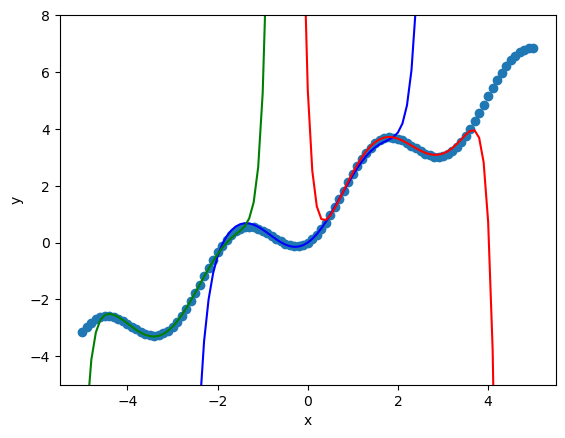

In [19]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5,8])

x_list = np.linspace(-5,5,101)
plt.scatter(x_list, func(x_list))

nmax = 15
h = 0.05

plt.plot(x_list, taylor(func, x_list, 0, nmax, h), 'blue')
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), 'red')
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), 'green')

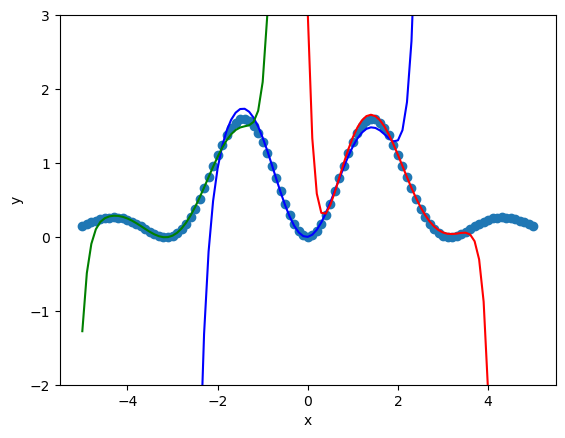

In [20]:
def func(x):
    return 2*np.sin(x)**2 * np.exp(-0.1*x**2)

plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,3])

x_list = np.linspace(-5,5,101)
plt.scatter(x_list, func(x_list))

nmax = 15
h = 0.05

plt.plot(x_list, taylor(func, x_list, 0, nmax, h), 'blue')
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), 'red')
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), 'green')

## 2. Interpolation

### 2.1 Generate data points

In [21]:
def correctFunction(x):
    return 15 + 2.4*x - 0.5*x**2 - 0.35*x**3

In [22]:
npoints = 21
x_list = np.linspace(-5,5,npoints)
data0 = np.array([x_list, correctFunction(x_list)])

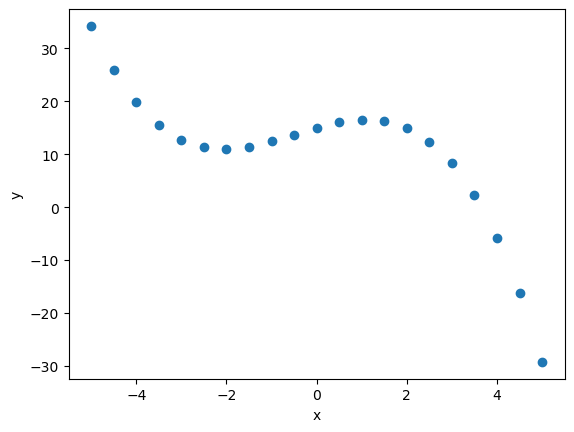

In [23]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])

Modify x and y values by adding random numbers

In [24]:
0.1 * (2*np.random.rand(npoints)-1)

array([ 0.0598883 ,  0.09875474,  0.05014584,  0.02805543, -0.03602817,
        0.03809343, -0.03323093,  0.0133379 , -0.03391734,  0.06230738,
       -0.06575474, -0.08884006, -0.00525817,  0.04432249, -0.00090089,
       -0.00333513, -0.09825036,  0.025508  , -0.02993735,  0.0894557 ,
       -0.03919385])

In [25]:
data = np.array([data0[0] + 0.25 * (2*np.random.rand(npoints)-1), data0[1] + 5.0 * (2*np.random.rand(npoints)-1)])

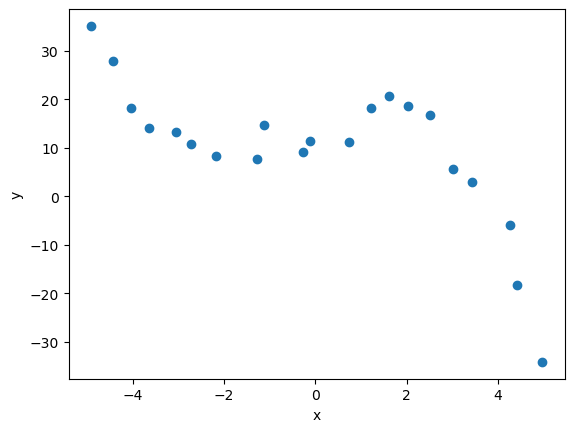

In [26]:
plt.xlabel('x')
plt.ylabel('y')

# plt.plot(data0[0], data0[1], 'black')
plt.scatter(data[0], data[1])

## 2.2 Spline interpolation

A spline interpolation always fits the data perfectly and even has a continuous derivative, if a cubic spline is used.

The spline is defined piecewise.

### 2.2.1 Unperturbed data

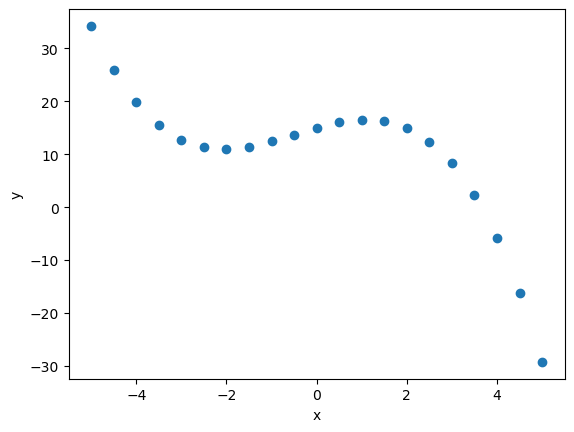

In [27]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])

In [28]:
from scipy import interpolate

- linear splines

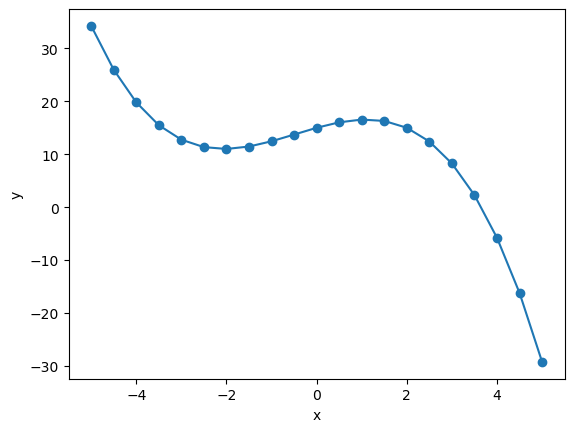

In [29]:
splineLinear0 = interpolate.interp1d(data0[0], data0[1], kind = 'linear')

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])
plt.plot(data0[0], splineLinear0(data0[0]))

- zoom

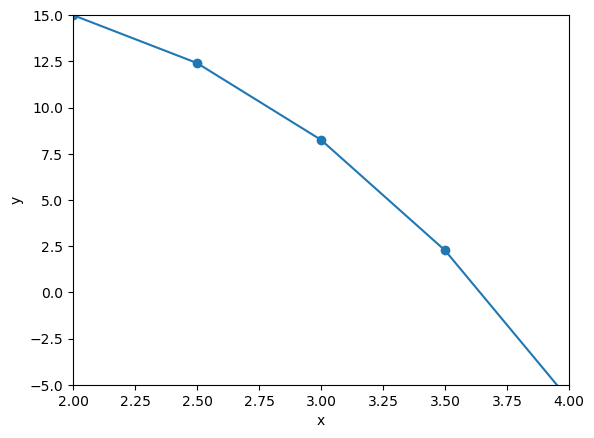

In [30]:
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineLinear0(x_list))

- cubic spline

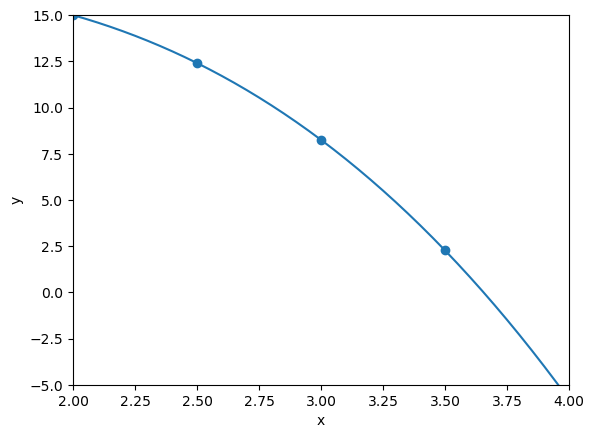

In [31]:
splineCubic0 = interpolate.interp1d(data0[0], data0[1], kind = 'cubic')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineCubic0(x_list))

### 2.2.2 Perturbed data

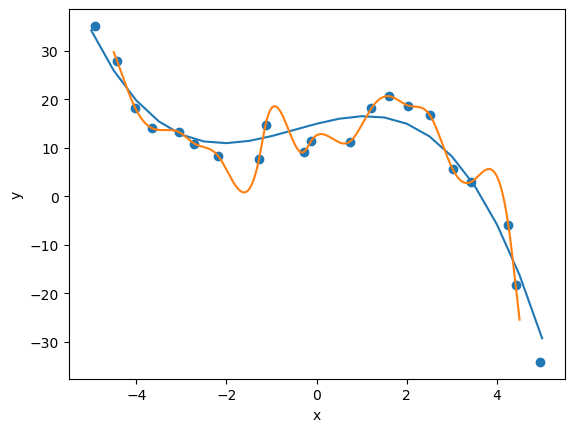

In [32]:
splineCubic = interpolate.interp1d(data[0], data[1], kind = 'cubic')

plt.xlabel('x')
plt.ylabel('y')

plt.plot(data0[0], data0[1])

x_list = np.linspace(-4.5,4.5,901)
plt.scatter(data[0], data[1])
plt.plot(x_list, splineCubic(x_list))

- handle data which is not smooth

In [33]:
splineSmooth = interpolate.UnivariateSpline(data[0], data[1])
splineSmooth.set_smoothing_factor(500)

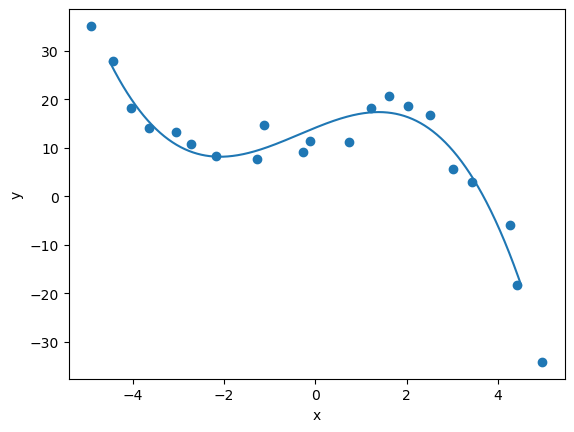

In [34]:
plt.xlabel('x')
plt.ylabel('y')

x_list = np.linspace(-4.5,4.5,901)
plt.scatter(data[0], data[1])
plt.plot(x_list, splineSmooth(x_list))

### Add-on: How you can always fit data with a polynomial

In [35]:
datapoly = data[:,7:14]

In [36]:
datapoly

array([[-1.27722916, -1.13277772, -0.27907036, -0.12300256,  0.73520881,
         1.21492756,  1.61442854],
       [ 7.76019785, 14.83239977,  9.22305529, 11.42860171, 11.31071164,
        18.2089583 , 20.66778641]])

There are 7 data points. That means we need a 6th order polynomial for the perfect interpolation

\\( f(x) = a_0 + a_1x + a_2x^2 + a_3x^3 + a_4x^4 + a_5x^5 + a_6x^6 \\).

This polynomial gives the correct value for all points \\( x_i, y_i \\)

\\( y_i = a_0 + a_1x_i + a_2x_i^2 + a_3x_i^3 + a_4x_i^4 + a_5x_i^5 + a_6x_i^6 \\)

We can express these 7 equations (\\( i = 0,\dots, 6 \\)) as a matrix equation

\\( 
\begin{pmatrix}
y_0\\y_1\\y_2\\y_3\\y_4\\y_5\\y_6
\end{pmatrix} = \begin{pmatrix}
1&x_0&x_0^2&x_0^3&x_0^4&x_0^5&x_0^6\\
1&x_1&x_1^2&x_1^3&x_1^4&x_1^5&x_1^6\\
1&x_2&x_2^2&x_2^3&x_2^4&x_2^5&x_2^6\\
1&x_3&x_3^2&x_3^3&x_3^4&x_3^5&x_3^6\\
1&x_4&x_4^2&x_4^3&x_4^4&x_4^5&x_4^6\\
1&x_5&x_5^2&x_5^3&x_5^4&x_5^5&x_5^6\\
1&x_6&x_6^2&x_6^3&x_6^4&x_6^5&x_6^6
\end{pmatrix}\begin{pmatrix}
a_0\\a_1\\a_2\\a_3\\a_4\\a_5\\a_6
\end{pmatrix}
\\)

The middle matrix is just a matrix of numbers that can calculated

In [38]:
x = np.transpose(
    np.array([
        datapoly[0,:]**0, datapoly[0,:]**1, datapoly[0,:]**2, datapoly[0,:]**3, datapoly[0,:]**4, datapoly[0,:]**5, datapoly[0,:]**6
    ])
)

In [39]:
y = datapoly[1,:]

Now, we can solve the system of linear (in \\(a_i\\)) equations.